# CIFAR10を用いたオートエンコーダの構築

(引用サイト)
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import tensorflow as tr
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(3072,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### エンコーダーの抽出

In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

### デコーダーの抽出

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### CIFAR10のダウンロードと前処理

In [5]:
from keras.datasets import cifar10
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

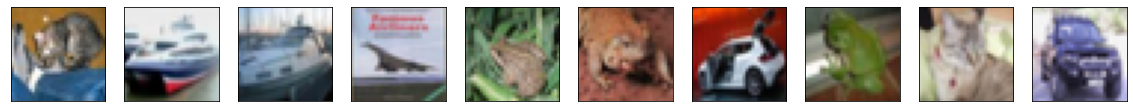

In [7]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [9]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


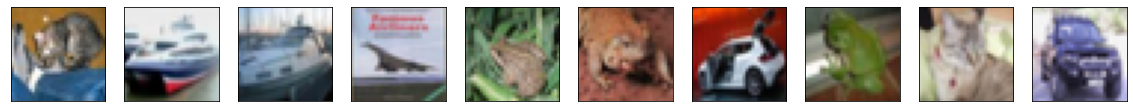

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### オートエンコーダの学習
自分自身の画像が正解となるように学習する。

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
196/196 [==============================] - 9s 43ms/step - loss: 0.6530 - val_loss: 0.6338
Epoch 2/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6276 - val_loss: 0.6252
Epoch 3/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6219 - val_loss: 0.6203
Epoch 4/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6183 - val_loss: 0.6172
Epoch 5/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6153 - val_loss: 0.6146
Epoch 6/50
196/196 [==============================] - 9s 48ms/step - loss: 0.6123 - val_loss: 0.6128
Epoch 7/50
196/196 [==============================] - 9s 44ms/step - loss: 0.6103 - val_loss: 0.6098
Epoch 8/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6083 - val_loss: 0.6080
Epoch 9/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6066 - val_loss: 0.6069
Epoch 10/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6055 - val_lo

### エンコーダーのテスト
encoderの出力として、encoded_imgsを抽出する。encoded_imgsは、32次元の画像特徴ベクトルとみなすことができる。

さらに、encoded_imgsをdecoderに入力して、decoded_imgsを抽出する。

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 3072)


### デコード画像の可視化
decoded_imgsを可視化して、どの程度、元画像を再現できているかを目視で確認する。

#### 元画像の表示

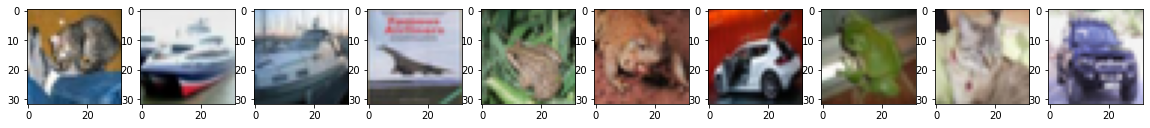

In [15]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
plt.show()

#### 生成画像の表示

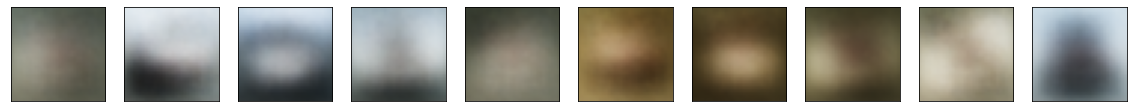

In [17]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()